### 机器学习
数据建模在机器学习中具有极其重要的地位。它是机器学习的核心组成部分，对于训练和评估模型、做出预测和优化决策都至关重要。

模型训练和学习：在机器学习中，模型通过从数据中学习模式和关系来进行训练。模型的性能和准确性取决于所用数据的质量和数量。良好的数据建模可以提供高质量的训练数据，有助于构建更准确和可靠的模型。

**机器学习的一般框架**

1. 选择模型： 根据问题的性质，选择适当的机器学习模型。例如，对于分类问题，可以选择支持向量机、决策树、随机森林等。
2. 划分数据集： 将数据集分为训练集和测试集，以便评估模型的性能。通常，80%的数据用于训练，20%用于测试。
3. 训练模型： 使用训练数据集来拟合模型。
4. 评估模型： 使用测试数据集评估模型性能。
5. 调优模型： 根据模型性能进行调优，可能需要调整模型超参数、使用交叉验证等。
6. 预测： 使用训练好的模型进行新数据的预测。

#### 题目一、以鸢尾花数据集为例学习 SVM
1. 加载数据，划分鸢尾花数据集，训练集比例0.2，随机种子42
2. 创建并训练 SVM 模型，使用线性核函数，随机种子42（也可以自己调试、体验不同参数的作用，选择更好的值，注释明确即可）
3. 使用 Accuracy、Recall、F1 Score、Confusion Matri 这四个评估指标来评估实验效果

Accurary :1.00
recall: 1.00
f1_score : 1.00


Text(0.5, 1.0, 'Confusion Matrix')

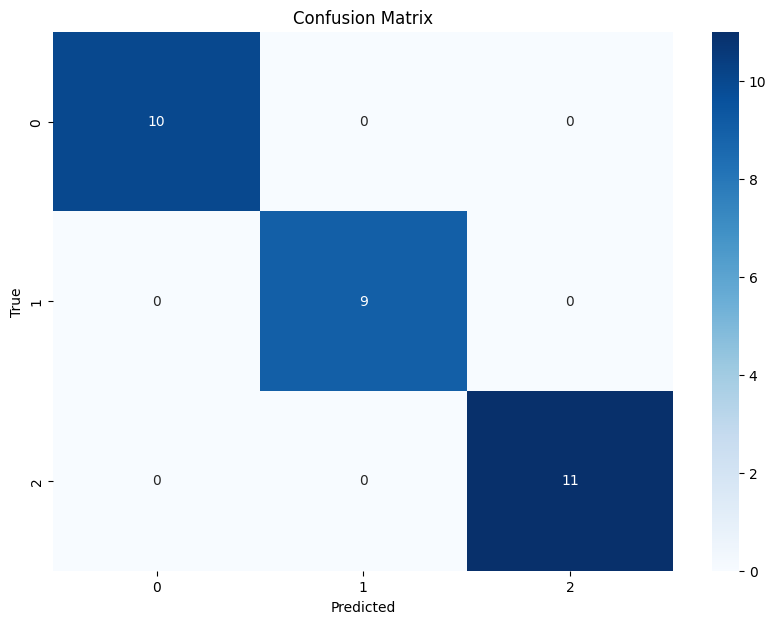

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support

iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
svm_classifier = svm.SVC(kernel = 'linear', C = 1, gamma = 'scale')
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accurary :{accuracy:.2f}')
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print(f'recall: {recall:.2f}\n'f'f1_score : {f1_score:.2f}')
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')


由这四个指标可知，这个分类器是一个完美的分类器

#### 题目二、以新闻数据分类为例 学习朴素贝叶斯
1. 导入库与数据集，数据集的导入方式：from sklearn.datasets import fetch_20newsgroups
2. 查看类别标签、数据集的描述、数据样本
3. 将文本数据转换为词袋模型
4. 将数据集分为训练集和测试集，训练集比例0.2，随机种子42
5. 创建并训练朴素贝叶斯分类器
6. 使用 Accuracy、Recall、F1 Score 这三个评估指标来评估实验效果
7. 横坐标为 Predicted，纵坐标为 Actual，画出混淆矩阵Confusion Matrix

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support

newsgroups = fetch_20newsgroups(subset = 'all')

能看出，类别标签一共有20个，每一条数据都是一条新闻，包含若干单词。

Accuracy: 0.7728
recall: 0.77
f1_score : 0.75


Text(0.5, 1.0, 'Confusion Matrix')

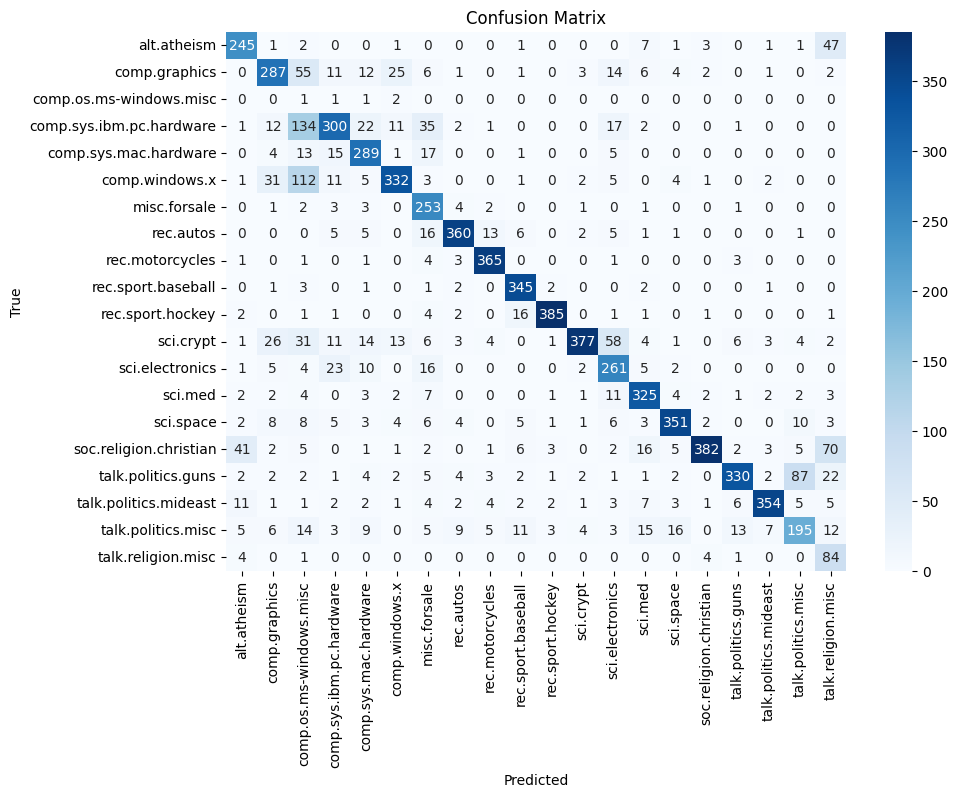

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
from sklearn.feature_extraction.text import CountVectorizer

newsgroups_train = fetch_20newsgroups(subset = 'train')
newsgroups_test = fetch_20newsgroups(subset = 'test')
vectorizer = CountVectorizer()

X_train = vectorizer.fit_transform(newsgroups_train.data)
y_train = newsgroups_train.target

X_test = vectorizer.transform(newsgroups_test.data)
y_test = newsgroups_test.target

clf = MultinomialNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print(f'recall: {recall:.2f}\n'f'f1_score : {f1_score:.2f}')
conf_matrix = confusion_matrix(y_pred, y_test)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')


题目三、以鸢尾花数据集为例 学习k-means聚类
1. 导入数据集和聚类库
2. 使用k-means聚类，将数据分为3个簇，设置随机种子为0
3. PCA 降维到2维空间后，输出可视化结果
4. 尝试先降维，再聚类，再输出可视化结果，比较两次的不同
5. 使用轮廓系数比较聚类效果
6. 绘制轮廓系数与聚类数的关系图

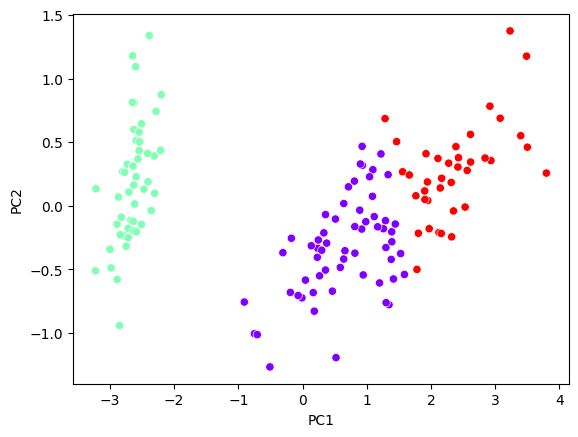

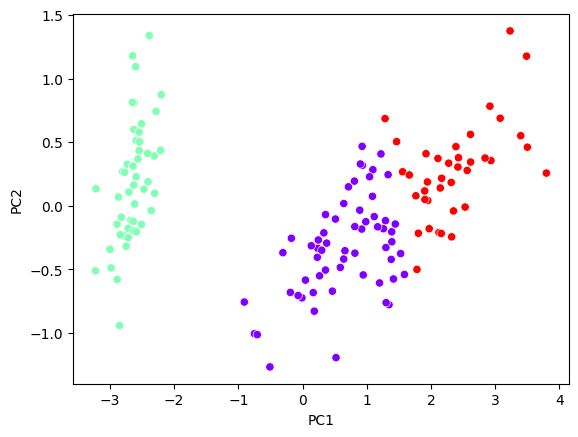

0.60


In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = datasets.load_iris()
X = iris.data
y = iris.target

kmeans = KMeans(n_clusters = 3, random_state = 0)

kmeans.fit(X)

labels = kmeans.labels_

pca = PCA(n_components = 2)
reduced_X = pca.fit_transform(X)

df_reduced_X = pd.DataFrame(reduced_X, columns = ['PC1', "PC2"])
sns.scatterplot(x = 'PC1', y = 'PC2', c = labels, cmap = 'rainbow', data = df_reduced_X)
plt.show()
plt.close()
kmeans = KMeans(n_clusters = 3, random_state = 0)

kmeans.fit(reduced_X)

reduced_labels = kmeans.labels_

sns.scatterplot(x = 'PC1', y = 'PC2', c = reduced_labels, cmap = 'rainbow', data = df_reduced_X)
plt.show()
sil_score = silhouette_score(reduced_X, reduced_labels)
print(f"{sil_score:.2f}")

先聚类再降维和先降维再聚类是一样的。

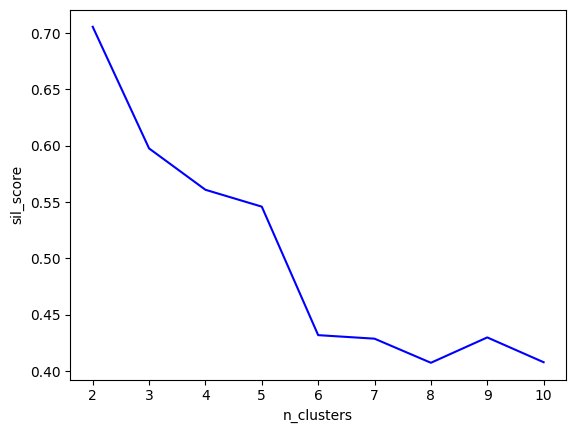

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = datasets.load_iris()
X = iris.data
y = iris.target

pca = PCA(n_components = 2)
reduced_X = pca.fit_transform(X)

sil_score = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(reduced_X)
    labels = kmeans.labels_
    sil_score.append(silhouette_score(reduced_X, labels))
    
n_clusters = [_ for _ in range(2, 11)]
plt.plot(n_clusters, sil_score, linestyle = '-', color = 'b')
plt.xlabel('n_clusters')
plt.ylabel('sil_score')
plt.show()

如图所示，聚类数和轮廓系数整体是呈负相关的